# 4. Preprocessing and Pipelines

Learn how to impute missing values, convert categorical data to numeric values, scale data, evaluate multiple supervised learning models simultaneously, and build pipelines to streamline your workflow!.

## Libraries

In [174]:
# Common
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Lasso
from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LinearRegression

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Import the necessary modules
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

# Data Split
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import confusion_matrix, classification_report

# Import root_mean_squared_error
from sklearn.metrics import root_mean_squared_error


# KNN
from sklearn.neighbors import KNeighborsClassifier

# Import modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Import StandardScaler
from sklearn.preprocessing import StandardScaler


## User Variables

There are too many shite changes in this exercises

# Exercises

## 1. Creating dummy variables

### Description

Being able to include categorical features in the model building process can enhance performance as they may add information that contributes to prediction accuracy.

The ``music_df`` dataset has been preloaded for you, and its shape is printed. Also, ``pandas`` has been imported as ``pd``.

Now you will create a new DataFrame containing the original columns of ``music_df`` plus dummy variables from the ``"genre"`` column.

### Instructions

* Use a relevant function, passing the entire ``music_df`` DataFrame, to create ``music_dummies``, dropping the first binary column.
* Print the shape of ``music_dummies``.

In [135]:
music_csv_path = "../Datasets/music.csv"
music_df = pd.read_csv(music_csv_path)

music_df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,41.0,0.6440,0.823,236533.0,0.814,0.687000,0.1170,-5.611,0.1770,102.619000,0.649,Jazz
1,62.0,0.0855,0.686,154373.0,0.670,0.000000,0.1200,-7.626,0.2250,173.915000,0.636,Rap
2,42.0,0.2390,0.669,217778.0,0.736,0.000169,0.5980,-3.223,0.0602,145.061000,0.494,Electronic
3,64.0,0.0125,0.522,245960.0,0.923,0.017000,0.0854,-4.560,0.0539,120.406497,0.595,Rock
4,60.0,0.1210,0.780,229400.0,0.467,0.000134,0.3140,-6.645,0.2530,96.056000,0.312,Rap


In [136]:
# Create music_dummies
music_dummies = pd.get_dummies(music_df, drop_first=True)

# Print the new DataFrame's shape
print("Shape of music_dummies: {}".format(music_dummies.shape))

Shape of music_dummies: (1000, 20)


As there were ten values in the ``"genre"`` column, nine new columns were added by a call of ``pd.get_dummies()`` using ``drop_first=True``. After dropping the original ``"genre"`` column, there are still eight new columns in the DataFrame!

## 2. Regression with categorical features

### Description

Now you have created ``music_dummies``, containing binary features for each song's genre, it's time to build a ridge regression model to predict song popularity.

``music_dummies`` has been preloaded for you, along with ``Ridge``, ``cross_val_score,`` ``numpy`` as ``np``, and a ``KFold`` object stored as ``kf``.

The model will be evaluated by calculating the average RMSE, but first, you will need to convert the scores for each fold to positive values and take their square root. This metric shows the average error of our model's predictions, so it can be compared against the standard deviation of the target value—``"popularity"``.

### Instructions

* Create ``X``, containing all features in ``music_dummies``, and ``y``, consisting of the ``"popularity"`` column, respectively.
* Instantiate a ridge regression model, setting ``alpha`` equal to ``0.2``.
* Perform cross-validation on ``X`` and ``y`` using the ridge model, setting ``cv`` equal to ``kf``, and using negative mean squared error as the scoring metric.
* Print the RMSE values by converting negative ``scores`` to positive and taking the square root.

In [34]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

In [137]:
music_dummies.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre_Anime,genre_Blues,genre_Classical,genre_Country,genre_Electronic,genre_Hip-Hop,genre_Jazz,genre_Rap,genre_Rock
0,41.0,0.6440,0.823,236533.0,0.814,0.687000,0.1170,-5.611,0.1770,102.619000,0.649,False,False,False,False,False,False,True,False,False
1,62.0,0.0855,0.686,154373.0,0.670,0.000000,0.1200,-7.626,0.2250,173.915000,0.636,False,False,False,False,False,False,False,True,False
2,42.0,0.2390,0.669,217778.0,0.736,0.000169,0.5980,-3.223,0.0602,145.061000,0.494,False,False,False,False,True,False,False,False,False
3,64.0,0.0125,0.522,245960.0,0.923,0.017000,0.0854,-4.560,0.0539,120.406497,0.595,False,False,False,False,False,False,False,False,True
4,60.0,0.1210,0.780,229400.0,0.467,0.000134,0.3140,-6.645,0.2530,96.056000,0.312,False,False,False,False,False,False,False,True,False


In [138]:
# Create X and y
X = music_dummies.drop("popularity", axis=1).values
y = music_dummies["popularity"].values

# Instantiate a ridge model
ridge = Ridge(alpha=0.2)

# Perform cross-validation
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

Average RMSE: 8.19718630310576
Standard Deviation of the target array: 14.02156909907019


Great work! An average RMSE of approximately ``8.24`` is lower than the standard deviation of the target variable (song popularity), suggesting the model is reasonably accurate.

## 3. Dropping missing data

### Description

Over the next three exercises, you are going to tidy the ``music_df`` dataset. You will create a pipeline to impute missing values and build a KNN classifier model, then use it to predict whether a song is of the ``"Rock"`` genre.

In this exercise specifically, you will drop missing values accounting for less than 5% of the dataset, and convert the ``"genre"`` column into a binary feature.

### Instructions

* Print the number of missing values for each column in the ``music_df`` dataset, sorted in ascending order.
* Remove values for all columns with 50 or fewer missing values.
* Convert ``music_df["genre"]`` to values of ``1`` if the row contains ``"Rock"``, otherwise change the value to ``0``.

In [140]:
music_csv_path = "../Datasets/music_unclean.csv"
music_df = pd.read_csv(music_csv_path)

music_df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,64.0,0.69400,0.610,217400.0,0.590,0.000002,0.1500,-7.325,0.0362,137.838000,0.352,NaN
1,31.0,0.73900,0.565,260467.0,0.393,0.000845,0.1430,-9.309,0.0244,75.537000,0.229,Anime
2,57.0,0.00879,0.433,262867.0,0.815,0.000000,0.1380,-3.658,NaN,125.358000,0.461,Rock
3,63.0,0.01050,0.359,563893.0,0.762,0.281000,0.3680,-8.323,0.0320,89.259000,0.167,Rock
4,NaN,0.30100,0.511,NaN,0.699,NaN,0.0884,NaN,0.0370,120.406497,0.496,Anime


In [141]:
# Print missing values for each column
print(music_df.isna().sum().sort_values())

# Remove values where less than 5% are missing
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])

# Convert genre to a binary feature
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)

print(music_df.isna().sum().sort_values())
print("Shape of the `music_df`: {}".format(music_df.shape))

genre                 8
popularity           31
loudness             44
liveness             46
tempo                46
speechiness          59
instrumentalness     91
duration_ms          91
danceability        143
valence             143
energy              200
acousticness        200
dtype: int64
popularity            0
loudness              0
liveness              0
tempo                 0
genre                 0
duration_ms          29
instrumentalness     29
speechiness          53
danceability        127
valence             127
energy              178
acousticness        178
dtype: int64
Shape of the `music_df`: (892, 12)


Well done! The dataset has gone from ``1000`` observations down to ``892``, but it is now in the correct format for binary classification and the remaining missing values can be imputed as part of a pipeline.

## 4. Pipeline for song genre prediction: I

### Description

Now it's time to build a pipeline. It will contain steps to impute missing values using the mean for each feature and build a KNN model for the classification of song genre.

The modified ``music_df`` dataset that you created in the previous exercise has been preloaded for you, along with ``KNeighborsClassifier`` and ``train_test_split``.

### Instructions

* Import ``SimpleImputer`` and ``Pipeline``.
* Instantiate an imputer.
* Instantiate a KNN classifier with three neighbors.
* Create ``steps``, a list of tuples containing the imputer variable you created, called ``"imputer"``, followed by the ``knn`` model you created, called ``"knn"``.

In [41]:
# Import modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Instantiate an imputer
imputer = SimpleImputer()

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors=3)

# Build steps for the pipeline
steps = [("imputer", imputer), 
         ("knn", knn)]

Perfect pipeline skills! You are now ready to build and evaluate a song genre classification model.

## 5. Pipeline for song genre prediction: II

### Description

Having set up the steps of the pipeline in the previous exercise, you will now use it on the ``music_df`` dataset to classify the genre of songs. What makes pipelines so incredibly useful is the simple interface that they provide.

``X_train``, ``X_test``, ``y_train``, and ``y_test`` have been preloaded for you, and confusion_matrix has been imported from ``sklearn.metrics``.

### Instructions

* Create a pipeline using the steps you previously defined.
* Fit the pipeline to the training data.
* Make predictions on the test set.
* Calculate and print the confusion matrix.

In [43]:
imp_mean = SimpleImputer()
knn = KNeighborsClassifier(n_neighbors=3)

In [143]:
music_csv_path = "../Datasets/music_clean.csv"
music_df = pd.read_csv(music_csv_path)

music_df.head()

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
1,37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
2,37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
3,36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
4,35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


In [144]:
X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
steps = [("imputer", imp_mean),
        ("knn", knn)]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[92 12]
 [ 0 96]]


Excellent! See how easy it is to scale our model building workflow using pipelines. In this case, the confusion matrix highlights that the model had ``92`` true positives and ``96`` true negatives!

## 6. Centering and scaling for regression

### Description

Now you have seen the benefits of scaling your data, you will use a pipeline to preprocess the ``music_df`` features and build a lasso regression model to predict a song's loudness.

``X_train``, ``X_test``, ``y_train``, and ``y_test`` have been created from the ``music_df`` dataset, where the target is ``"loudness"`` and the features are all other columns in the dataset. ``Lasso`` and ``Pipeline`` have also been imported for you.

Note that ``"genre"`` has been converted to a binary feature where ``1`` indicates a rock song, and ``0`` represents other genres.

### Instructions

* Import ``StandardScaler``.
* Create the steps for the pipeline object, a ``StandardScaler`` object called ``"scaler"``, and a lasso model called ``"lasso"`` with ``alpha`` set to ``0.5``.
* Instantiate a pipeline with steps to scale and build a lasso regression model.
* Calculate the R-squared value on the test data.

In [150]:
music_csv_path = "../Datasets/music_clean.csv"
music_df = pd.read_csv(music_csv_path, index_col=0)

music_df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


In [151]:
X = music_df.drop("loudness", axis=1).values
y = music_df["loudness"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [152]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

0.7185052288252618


Awesome scaling! The model may have only produced an R-squared of ``0.718``, but without scaling this exact model would have only produced a score of ``0.35``, which proves just how powerful scaling can be!

## 7. Centering and scaling for classification

### Description

Now you will bring together scaling and model building into a pipeline for cross-validation.

Your task is to build a pipeline to scale features in the ``music_df`` dataset and perform grid search cross-validation using a logistic regression model with different values for the hyperparameter ``C``. The target variable here is ``"genre"``, which contains binary values for rock as 1 and any other genre as 0.

``StandardScaler``, ``LogisticRegression``, and ``GridSearchCV`` have all been imported for you.

### Instructions

* Build the steps for the pipeline: a ``StandardScaler()`` object named ``"scaler"``, and a logistic regression model named ``"logreg"``.
* Create the ``parameters``, searching 20 equally spaced float values ranging from ``0.001`` to ``1.0`` for the logistic regression model's ``C`` hyperparameter within the pipeline.
* Instantiate the grid search object.
* Fit the grid search object to the training data.

In [161]:
music_csv_path = "../Datasets/music_clean.csv"
music_df = pd.read_csv(music_csv_path, index_col=0)

music_df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


In [162]:
X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values

In [163]:
# Build the steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]
pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

0.8625 
 {'logreg__C': np.float64(0.15873684210526315)}


Well done! Using a pipeline shows that a logistic regression model with ``"C"`` set to approximately ``0.1`` produces a model with ``0.8625`` accuracy!

## 8. Visualizing regression model performance

### Description

Now you have seen how to evaluate multiple models out of the box, you will build three regression models to predict a song's ``"energy"`` levels.

The ``music_df ``dataset has had dummy variables for ``"genre"`` added. Also, feature and target arrays have been created, and these have been split into ``X_train``, ``X_test``, ``y_train``, and ``y_test``.

The following have been imported for you: ``LinearRegression``, ``Ridge``, ``Lasso``, ``cross_val_score``, and ``KFold``.

### Instructions

* Write a for loop using ``model`` as the iterator, and ``model.values()`` as the iterable.
* Perform cross-validation on the training features and the training target array using the model, setting ``cv`` equal to the ``KFold`` object.
* Append the model's cross-validation scores to the results list.
* Create a box plot displaying the results, with the x-axis labels as the names of the models.

In [165]:
music_csv_path = "../Datasets/music_clean.csv"
music_df = pd.read_csv(music_csv_path, index_col=0)

music_df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


In [166]:
# Create X and y
X = music_df.drop("energy", axis=1).values
y = music_df["energy"].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

C:\Users\sanja\AppData\Local\Temp\ipykernel_24912\2837440438.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=models.keys())


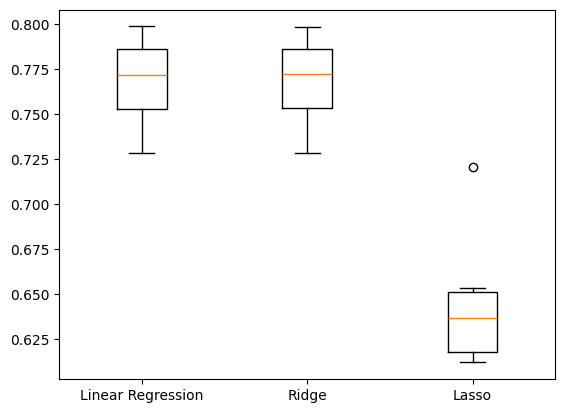

In [167]:
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)
  
# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

Nicely done! Lasso regression is not a good model for this problem, while linear regression and ridge perform fairly equally. Let's make predictions on the test set, and see if the RMSE can guide us on model selection.

## 9. Predicting on the test set

### Description

In the last exercise, linear regression and ridge appeared to produce similar results. It would be appropriate to select either of those models; however, you can check predictive performance on the test set to see if either one can outperform the other.

You will use root mean squared error (RMSE) as the metric. The dictionary ``models``, containing the names and instances of the two models, has been preloaded for you along with the training and target arrays ``X_train_scaled``, ``X_test_scaled``, ``y_train``, and ``y_test``.

### Instructions

* Import ``root_mean_squared_error``.
* Fit the model to the scaled training features and the training labels.
* Make predictions using the scaled test features.
* Calculate RMSE by passing the test set labels and the predicted labels.

In [176]:
models = {'Linear Regression': LinearRegression(), 'Ridge': Ridge()}

In [177]:
music_csv_path = "../Datasets/music_clean.csv"
music_df = pd.read_csv(music_csv_path, index_col=0)

music_df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


In [178]:
# Create X and y
X = music_df.drop("energy", axis=1).values
y = music_df["energy"].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate scaler
scaler = StandardScaler()

# Fit on X and transform
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [179]:
# Import root_mean_squared_error
from sklearn.metrics import root_mean_squared_error

for name, model in models.items():
  # Fit the model to the training data
  model.fit(X_train_scaled, y_train)
  
  # Make predictions on the test set
  y_pred = model.predict(X_test_scaled)
  
  # Calculate the test_rmse
  test_rmse = root_mean_squared_error(y_test, y_pred)
  print("{} Test Set RMSE: {}".format(name, test_rmse))

Linear Regression Test Set RMSE: 0.11126161573648322
Ridge Test Set RMSE: 0.11155533181609373


The linear regression model just edges the best performance, although the difference is a RMSE of 0.00001 for popularity! Now let's look at classification model selection.

## 10. Visualizing classification model performance

### Description

In this exercise, you will be solving a classification problem where the ``"popularity" ``column in the ``music_df`` dataset has been converted to binary values, with ``1`` representing popularity more than or equal to the median for the ``"popularity"`` column, and ``0`` indicating popularity below the median.

Your task is to build and visualize the results of three different models to classify whether a song is popular or not.

The data has been split, scaled, and preloaded for you as ``X_train_scaled``, ``X_test_scaled``, ``y_train``, and ``y_test``. Additionally, ``KNeighborsClassifier``, ``DecisionTreeClassifier``, and ``LogisticRegression`` have been imported.

### Instructions

* Create a dictionary of ``"Logistic Regression"``, ``"KNN"``, and ``"Decision Tree Classifier"``, setting the dictionary's values to a call of each model.
* Loop through the values in ``models``.
* Instantiate a ``KFold`` object to perform 6 splits, setting ``shuffle`` to ``True`` and ``random_state`` to ``12``.
* Perform cross-validation using the model, the scaled training features, the target training set, and setting ``cv`` equal to ``kf``.

In [215]:
music_csv_path = "../Datasets/music_clean.csv"
music_df = pd.read_csv(music_csv_path, index_col=0)

_median = music_df["popularity"].median()
music_df["binary_popularity"] = [1 if i >= _median else 0 for i in music_df["popularity"]]

music_df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre,binary_popularity
36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1,1
37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1,1
37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1,1
36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1,1
35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1,1


In [222]:
# Create X and y

X = music_df.drop(["genre", "binary_popularity"], axis=1).values
y = music_df["binary_popularity"].values

# Instantiate scaler
scaler = StandardScaler()

# Fit on X and transform
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

c:\Users\sanja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\sanja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

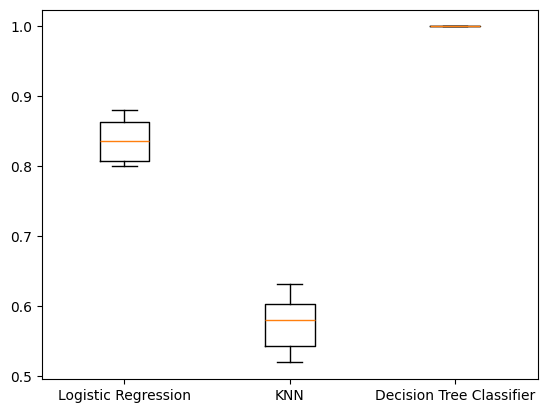

In [223]:
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

Looks like logistic regression is the best candidate based on the cross-validation results! Let's wrap up by building a pipeline

## 11. Pipeline for predicting song popularity

### Description

For the final exercise, you will build a pipeline to impute missing values, scale features, and perform hyperparameter tuning of a logistic regression model. The aim is to find the best parameters and accuracy when predicting song genre!

All the models and objects required to build the pipeline have been preloaded for you.

### Instructions

* Create the steps for the pipeline by calling a simple imputer, a standard scaler, and a logistic regression model.
* Create a pipeline object, and pass the ``steps`` variable.
* Instantiate a grid search object to perform cross-validation using the pipeline and the parameters.
* Print the best parameters and compute and print the test set accuracy score for the grid search object.

In [225]:
music_csv_path = "../Datasets/music_clean.csv"
music_df = pd.read_csv(music_csv_path, index_col=0)

music_df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


In [226]:
# Create X and y

X = music_df.drop(["genre"], axis=1).values
y = music_df["genre"].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [227]:
# Create steps
steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))

Tuned Logistic Regression Parameters: {'logreg__C': np.float64(0.778), 'logreg__solver': 'newton-cg'}, Accuracy: 0.884


Excellent - you've selected a model, built a preprocessing pipeline, and performed hyperparameter tuning to create a model that is ``88%`` accurate in predicting song genres!